In [1]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 1.0.2.


Cargamos el dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

trollers = pd.read_csv("C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv", header="infer", sep=",",error_bad_lines=False, engine ='python')

#Nos quedamos solo con las columnas que estan clasificadas 100% como pescando, o no pescando. Que no haya duda.
df = trollers.copy()
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')
trollers = df.copy()
#print(trollers)

Dropeamos los NA, y nos quedamos con los puntos que se encuentran a 3 millas de la costa.

In [3]:
#Dropeamos NA.
df = df.dropna()
#Generamos Feature Engeniering.
df = df[(df['distance_from_shore'] >= 5556)]
#print(len(df))
#Dropeamos columnas que no interesen en el modelo.
df = df.drop(['mmsi', 'source','lat', 'lon','timestamp'], axis = 1)
print(df)

trollers = df.copy()

        distance_from_shore  distance_from_port  speed      course is_fishing
270             8246.008789        23769.144531    7.6  248.899994         NO
271             8944.052734        24165.498047    7.8  252.399994         NO
272            10629.884766        25238.240234    7.6  252.600006         NO
273            11313.430664        26076.169922    7.5   66.000000         NO
274            11180.065430        26400.109375    7.6   71.500000         NO
...                     ...                 ...    ...         ...        ...
166226         14764.460938        29119.724609    7.9  256.100006         NO
166232         13453.293945        24738.027344    7.5  229.699997         NO
166240          9848.616211        12369.013672    2.4  123.800003         NO
166241          9433.749023        11704.412109    2.9  120.000000         NO
166242         10629.884766        12206.255859    2.8  105.800003         NO

[21426 rows x 5 columns]


Generamos los vectores de train y test.

In [4]:
#Generamos train y test.

#Si la longitud del dataset es mayor a 10000, partiremos agrupado por "is_fishing" ya que nos puede tocar un conjunto con is_fishing='SI' vacio.
#if len(dataset)>10000:
    #df = df.sample(n=10000, random_state=1)
#    df = df.groupby("is_fishing").sample(n=7500, random_state=1,replace=True)
#    df = df.drop_duplicates()

X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))

1883
19543


Funcion para evaluar los modelos.

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['SI', 'NO'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)


Arboles de decision parametros default

Arboles de decision parametros default

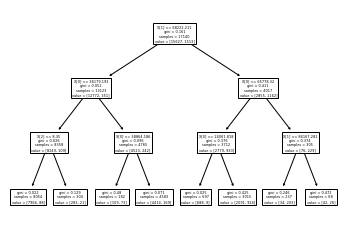

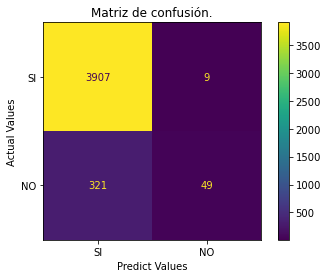

Precision,Recall,Accuracy,F1
0.84,0.13,0.92,0.23


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

tree.plot_tree(dt)

evaluate_model('Arboles de decision parametros default',y_test, y_pred)


Arboles de decision optimizado

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Train Accuracy : 0.991
Test Accuracy : 0.965
Best Score Through Grid Search : 0.960
Best Parameters :  {'max_depth': 16, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}


Arboles de decision optimizado

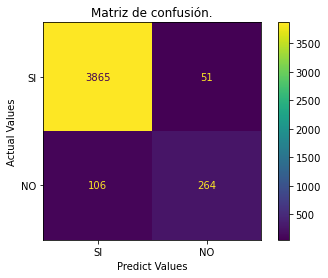

Precision,Recall,Accuracy,F1
0.84,0.71,0.96,0.77


In [7]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#extra_tree_classifier = ExtraTreeClassifier(random_state=1)
#extra_tree_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [11,12,13,14,15,16],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0, 0.1,0.2],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10] }

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=3,
                    param_grid =parameters
                    )

grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], 
                            max_features=grid.best_params_['max_features'],
                            max_leaf_nodes=grid.best_params_['max_leaf_nodes'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_weight_fraction_leaf=grid.best_params_['min_weight_fraction_leaf'],
                            splitter=grid.best_params_['splitter']
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Best Parameters : ',grid.best_params_)
evaluate_model('Arboles de decision optimizado',y_test, y_pred)

Random Forest default

Random Forest default

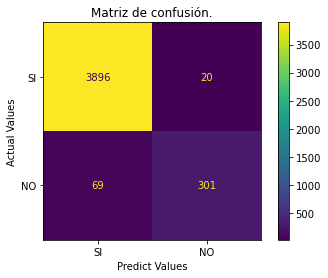

Precision,Recall,Accuracy,F1
0.94,0.81,0.98,0.87


In [8]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
evaluate_model('Random Forest default', y_test, y_pred)

Random forest optimizado

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


D:\Users\nico_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\nico_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\nico_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\Users\nico_\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Users\nico_\anaconda3\lib\site-package

Train Accuracy : 0.992
Test Accuracy : 0.976
Best Score Through Grid Search : 0.970
Best Parameters :  {'bootstrap': False, 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Random forest optimizado

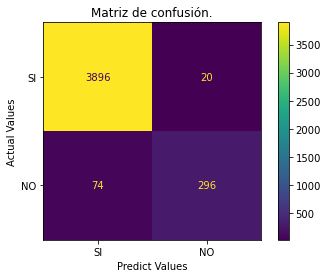

Precision,Recall,Accuracy,F1
0.94,0.80,0.98,0.86


In [9]:

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [12,13,14,15],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [1, 5 , 10],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = RandomForestClassifier(bootstrap=grid.best_params_['bootstrap'], 
                            max_depth=grid.best_params_['max_depth'],
                            max_features=grid.best_params_['max_features'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            n_estimators=grid.best_params_['n_estimators']
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_model('Random forest optimizado', y_test, y_pred)


In [10]:
print('Best Parameters : ',grid.best_params_)

Best Parameters :  {'bootstrap': False, 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Support Vector Machine.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


rbf

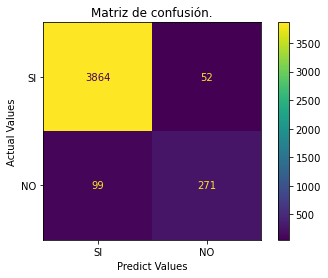

Precision,Recall,Accuracy,F1
0.84,0.73,0.96,0.78


Train Accuracy : 0.983
Test Accuracy : 0.965
Best Score Through Grid Search : 0.960
Best Parameters :  {'C': 100, 'gamma': 1e-06, 'kernel': 'rbf'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


sigmoid

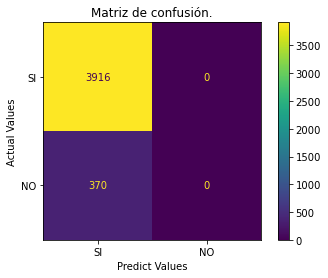

D:\Users\nico_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision,Recall,Accuracy,F1
0.00,0.00,0.91,0.00


Train Accuracy : 0.912
Test Accuracy : 0.914
Best Score Through Grid Search : 0.912
Best Parameters :  {'C': 0.001, 'coef0': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10 ]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10], 'coef0 ':[0,0.1,1]},
              {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 1]}     
]

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-5,1e-6],'C': [0.001,1,10,100]},
              {'kernel': ['sigmoid'], 'gamma': [1e-1,1e-2,1e-3],'C': [0.001, 0.10,0.1,1],'coef0' : [0.01,0.1,1,10]},
              {'kernel': ['linear'], 'C': [1]}
              ]

for parameter in parameters:
    param_grid = parameter
    
    grid = GridSearchCV(SVC(), param_grid, n_jobs = -1, verbose = 3)
    grid.fit(X_train, y_train)
    kernel_str = parameter['kernel'][0]
    y_pred = grid.predict(X_test)
    dt = grid
    evaluate_model(kernel_str, y_test, y_pred)
    
    print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
    print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
    print('Best Score Through Grid Search : %.3f'%grid.best_score_)
    print('Best Parameters : ',grid.best_params_)

light_gbm default

light_gbm default

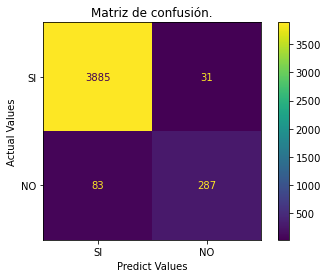

Precision,Recall,Accuracy,F1
0.90,0.78,0.97,0.83


In [12]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

dt=lgb.LGBMClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
evaluate_model('light_gbm default',y_test, y_pred)

light_gbm con optimizacion bayesiana.

In [84]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict


# Load Boston housing data
boston=load_boston()
X =pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

application_train = X_train.join(y_train)
application_train, categorical_feats, encoder_dict = label_encoder(application_train)

X = application_train.drop('is_fishing', axis=1)
y = application_train.is_fishing


#dtrain = lgb.Dataset(data=X, label=y)

def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations=100):
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    # Objective Function
    def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,lambda_l1, lambda_l2, learning_rate):
            
            params = {'application':'binary','num_iterations': num_iterations,'early_stopping_round':int(50 + 7/learning_rate),
                        'metric':'lgb_r2_score'} # Default parameters

            params["num_leaves"] = int(round(num_leaves))
            params['feature_fraction'] = max(min(feature_fraction, 1), 0)
            params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
            params['max_depth'] = int(round(max_depth))
            params['min_split_gain'] = min_split_gain
            params['min_child_weight'] = min_child_weight
            
            params['learning_rate']= max(min(learning_rate, 1), 0)
            params['lambda_l1']= lambda_l1
            params['lambda_l2']= lambda_l2
            
            params['verbose']=-1
            params['objective'] ='binary'
            params['boost_from_average']=True #adjusts initial score to the mean of labels for faster convergence
            
            cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=lgb_r2_score)
                            
            # print(cv_results)
            return np.max(cv_results['r2-mean'])
    # Domain space-- Range of hyperparameters 
    #https://lightgbm.readthedocs.io/en/latest/Parameters.html

    pds = {
                #'eta':(0.025,0.15),
                'num_leaves': (8, 1024),
                'feature_fraction': (0.1, 1.0),
                'bagging_fraction': (0.1, 1),
                'max_depth': (30, 70),
                'min_split_gain': (0.0, 20),
                'min_child_weight': (10, 50),
                'lambda_l1':(0.0,10),
                'lambda_l2':(0.0,100),
                'learning_rate':(0.01, 0.1)          
                }



    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                        
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)
    return optimizer.max['params']

parametros_optimos = bayesion_opt_lgbm(X, y, init_iter=100, n_iters=500, random_state=77, seed = 101, num_iterations = 1000)
print(parametros_optimos)


|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.3842   |  0.9272   |  0.678    |  7.537    |  13.93    |  0.01786  |  61.52    |  23.05    |  10.82    |  252.1    |
|  2        |  0.3317   |  0.5909   |  0.4605   |  7.152    |  83.67    |  0.06296  |  41.85    |  21.24    |  14.11    |  437.4    |
|  3        |  0.3776   |  0.1516   |  0.7723   |  4.523    |  17.58    |  0.01444  |  41.7     |  12.67    |  15.02    |  72.79    |
|  4        |  0.3936   |  0.4887   |  0.4278   |  1.52     |  54.67    |  0.0499   |  31.44    |  42.92    |  5.466    |  179.7    |
|  5        |  0.3653   |  0.6799   |  0.1968   |  3.532    |  38.57    |  0.0501   |  69.08    |  39.18    |  6.245    |  917.1    |
|  6        |  0.3705   |  0.8049   |  0.3358   |  3.095    | 

In [85]:
print(parametros_optimos)

{'bagging_fraction': 0.1, 'feature_fraction': 1.0, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'learning_rate': 0.1, 'max_depth': 39.47135025213841, 'min_child_weight': 19.265516883819366, 'min_split_gain': 0.0, 'num_leaves': 407.14906664442}


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 17140, number of used features: 4
[LightGBM] [Info] Start training from score 0.088273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

light_gbm optimizacion bayesiana

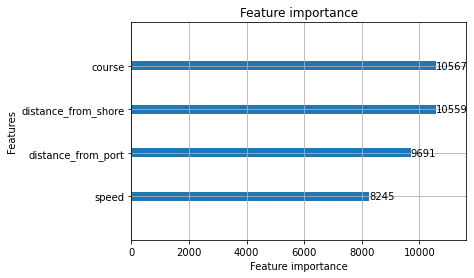

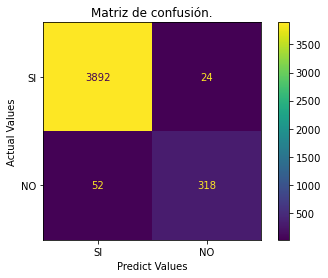

Precision,Recall,Accuracy,F1
0.93,0.86,0.98,0.89


In [86]:
parametros_optimos['max_depth'] = int(round(parametros_optimos['max_depth']))
parametros_optimos['num_leaves'] = int(round(parametros_optimos['num_leaves']))

dtrain = lgb.Dataset(data=X, label=y)
def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True
dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
#clf = lgb.fit(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)

lgb.plot_importance(dt)

y_pred = dt.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
#print(y_pred)

evaluate_model('light_gbm optimizacion bayesiana',y_test, y_pred)
#cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index


| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  | 0.84  | 0.71  | 0.96  | 0.77  |
|    Random Forest  | 0.94  | 0.80  | 0.98  | 0.86  |
|    SVM        | Content Cell  | Content Cell  | Content Cell  | Content Cell  |
|    LightGBM        | 0.93  | 0.86  | 0.98  | 0.89  |
			

			


						